# 30-features-models-reports: Create new features to be used in models and report results
The purpose of this notebook is 3-fold:
1. [Feature engineering](#Feature-investigation-and-creation) - generate new features
2. [Modeling](#Modeling) - create and evaluate models of the data  
    a. [Generic machine learning models](#Basic-machine-learning-models)  
    b. [H2O modeling + hyperparameter optimization](#Machine-learning-via-h2o)  
    c. [Deep learning](#Modeling-via-deep-learning)
3. [Report](#Reporting) - convey the results of the data

**A note on variable encodings**
- **scikit-learn**: If using scikit-learn, it's inadvisable to explicitly create a new dataset with your one hot or binary-encoded features.  This is because it is better to include them as a section of the larger pipeline which will include the prediction strategy and perhaps modeling.
- **h2o**: If using h2o, it is not *strictly* necessary to explicitly define the encodings.  H2o is able to do this [under the hood](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/categorical_encoding.html) for most of its algorithms in an optimized way.

#### Common helpful packages

*If you are on google colab, run this cell to ensure you are able to import fastai.*

In [ ]:
!pip install --upgrade fastai fastcore

####Import modules

In [ ]:
#Data analysis and processing
import pandas as pd
import numpy as np

#plotting
import matplotlib.pyplot as plt
import seaborn as sns

#dataloader
from digital_connoisseur.dataloader import *

If you get "ModuleNotFoundError: No module named 'digital_connoisseur'," you are most likely in the wrong directory.

If this happens, run the following cell, filling in the path to the repository when it asks for it. Then try to run the above cell again.

In [ ]:
path_to_repo = input('Enter path to repository\n> ')
from os import chdir
print(f'Changing working directory to {path_to_repo}')
try:
  chdir(path_to_repo)
  print('Done.')
except:
  print(f'ERROR: "{path_to_repo}" is not a directory. Please try again.')

# Get the Data

Enter path to zip file
>/content/drive/My Drive/dc-data.zip
Where do you want it stored?
>/content
Moving zip file from /content/drive/My Drive/dc-data.zip to /content/dc-data.zip...
Unzipping zip file at /content/dc-data.zip...
Done. Data should be at /content/dc-data.
Segmentation seems to have already been performed on this data.
Do you want to do it again? y/[n]
> n
Constructing DataBlock...
Done.


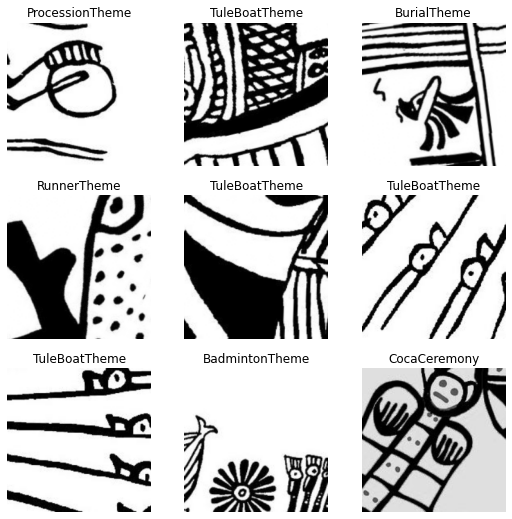

In [ ]:
dls = get_dls(colab=True) # Make sure to properly set the colab arg, to indicate whether you're on colab.

# This cell will prompt you to provide a path to the data. It is either expecting
# a zip file (if you're on colab) or a folder (if you're working locally). If you're
# on colab, it will also ask you where you want the data stored; I recommend /content as a storage location.
# Be careful not to store the data inside the repository; we don't want to upload it to github.
# If you get an error message, it is likely because you typed one of the paths incorrectly. Just run the cell again
# and double-check the locations of all files.

dls.train.show_batch()

# Modeling

In [ ]:
#Import fastai
from fastai.vision.all import *

Somewhat arbitrarily, we will use a `resnet34` as our initial model. The `resnet34` is the lightest `resnet` available to us.

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5) #Train for 5 epochs

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.186061,0.807252,0.279824,01:49


epoch,train_loss,valid_loss,error_rate,time
0,0.717584,0.447054,0.155946,02:23
1,0.480425,0.314232,0.109951,02:22
2,0.351471,0.175485,0.061206,02:22
3,0.223652,0.113301,0.038849,02:22
4,0.168709,0.097377,0.032985,02:22


Now that we have our model trained, we can interpret its results by taking a look at its confusion matrix.

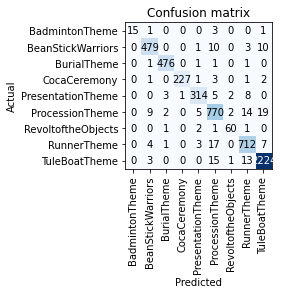

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

These results look suspiciously good, so we validate them on the holdout set.

In [ ]:
dl_holdout = learn.dls.test_dl(holdout_set, with_labels=True)
results = learn.validate(dl=dl_holdout)
print(results)

[1.530562162399292, 0.34958264231681824]


If I am interpreting these results correctly, the model has a loss of 1.5 and an error rate of 0.35 when confronted with brand new data. This is significantly less impressive than the 0.03 error rate we were getting earlier.